In [1]:
import os
import time
import errno
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [2]:
file = open('E:\\STUDY\\로또\\936당첨번호.xls')
file_lines = file.readlines()
file.close()

In [3]:
def remove_duplicated(num_list):
    num_list = set(num_list)
    num_list = list(num_list)
    
    return num_list

In [4]:
def reversed_number(num_list):
    reversed_num_list = list()
    for i in range(1, 46):
        if i not in num_list:
            reversed_num_list.append(i)
    
    return reversed_num_list

In [5]:
scores = [0] * 46

def update_scores(num_list, score=1):
    for num in num_list:
        scores[num] += score

In [6]:
num_list = list()
new_num_list = list()

for file_line in file_lines:
    if '</tr>' in file_line and len(new_num_list) == 7:
        num_list.append(new_num_list)
    if '<tr>' in file_line:
        new_num_list = list()
    if '<td>' in file_line and '</td>' in file_line:
        if len(file_line) < 17:
            num = re.findall("\d+", file_line)
            if len(num) > 0:
                new_num_list.append(int(num[0]))

display(num_list[0:10])

[[7, 11, 13, 17, 18, 29, 43],
 [4, 10, 20, 32, 38, 44, 18],
 [1, 3, 30, 33, 36, 39, 12],
 [23, 27, 29, 31, 36, 45, 37],
 [1, 6, 15, 36, 37, 38, 5],
 [14, 15, 23, 25, 35, 43, 32],
 [8, 21, 25, 38, 39, 44, 28],
 [7, 9, 12, 15, 19, 23, 4],
 [3, 4, 10, 20, 28, 44, 30],
 [4, 15, 22, 38, 41, 43, 26]]

### 빈도분산

1. 같은 구간에서 수가 몰아 나오기는 힘들다.
2. 그렇다고 모든 구간에서 수가 고르게 나오기도 힘들다.
3. 따라서 같은 구간에서 수가 나와봤자 최대 2수가 한계일 것이다

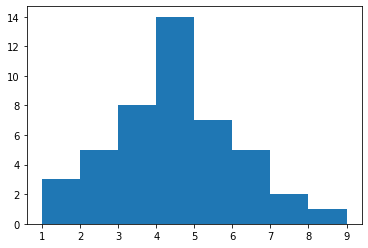

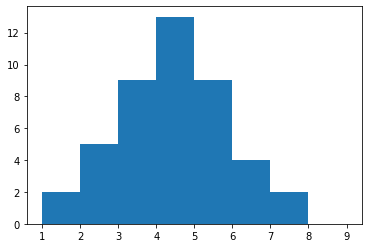

[26, 45]
[8, 9, 19, 28, 30]
[2, 5, 10, 20, 25, 29, 31, 37, 41]
[1, 4, 12, 13, 14, 15, 16, 24, 32, 33, 34, 35, 39]
[6, 7, 11, 17, 18, 21, 27, 36, 42]
[22, 23, 38, 43]
[3, 44]


In [7]:
def frequency_analysis(latest_num_list, number_of_bins=10):
    count_num_list = [0] * 46
    for nums in latest_num_list:
        for num in nums[:6]:
            count_num_list[num] += 1
    
    plt.hist(count_num_list, bins=range(1,number_of_bins))
    plt.show()
    return count_num_list

tmp = frequency_analysis(num_list[0:30])
tmp = frequency_analysis(num_list[0:29])

for j in range(1, 8): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

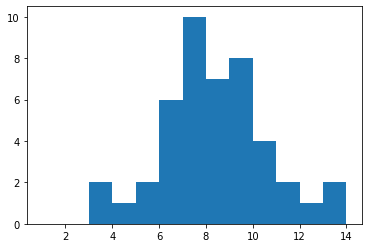

[]
[]
[30, 40]
[10]
[8, 9]
[5, 11, 20, 25, 29, 33]
[2, 12, 13, 15, 19, 24, 26, 34, 35, 41]
[1, 6, 22, 28, 31, 32, 36]
[14, 16, 17, 21, 37, 42, 43, 45]
[4, 7, 27, 44]
[3, 39]
[23]
[18, 38]
[]


In [8]:
bins = 15
tmp = frequency_analysis(num_list[0:59], bins)

for j in range(1, bins): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

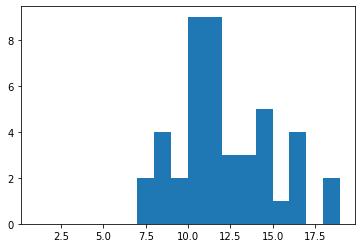

[]
[]
[]
[]
[]
[]
[9, 40]
[10, 11, 29, 30]
[8, 20]
[1, 5, 12, 24, 31, 33, 35, 41, 45]
[6, 7, 13, 14, 15, 25, 26, 36, 37]
[2, 4, 19]
[21, 27, 42]
[3, 16, 28, 32, 34]
[23]
[17, 18, 22, 44]
[]
[38, 43]
[]


In [9]:
bins = 20
tmp = frequency_analysis(num_list[0:89], bins)

for j in range(1, bins): 
    values = list()
    for i in range(1, 46):
        if tmp[i] == j:
            values.append(i)      
    print(values)

In [10]:
last_10 = num_list[0:10]

count_last_10 = [0] * 46
for nums in last_10:
    for num in nums:
        count_last_10[num] += 1

display(pd.DataFrame(count_last_10).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,0,2,4,1,1,2,1,1,2,1,2,1,1,4,0,1,2,1,2,1,1,3,0,2,1,1,2,2,2,1,2,1,0,1,3,2,4,2,0,1,0,3,3,1


In [11]:
last_3 = num_list[0:3]

count_last_3 = [0] * 46
for nums in last_3:
    for num in nums:
        count_last_3[num] += 1
        
display(pd.DataFrame(count_last_3).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0


### 포지션 분석

포지션분석은 단순하게 출현한 공의 빈도가 아닌 지정된 위치에 출현한 공의 빈도를 사용합니다.<br>
즉. 당첨번호 6개를 작은 번호부터 순서대로 나열한 후 총 6구간으로 나눈뒤 그 위치에 출현한 빈도를 봅니다.<br>
예를 들면 645회차까지 60게임중 최근 5게임은 다음과 같습니다.

645회  1  4 16 26 40 41<br>
644회  5 13 17 23 28 36<br>
643회 15 24 31 32 33 40<br>
642회  8 17 18 24 39 45<br>
641회 11 18 21 36 37 43<br>

17번을 예로 들면 17번은 2번 출현하였습니다. 그런데 645회때는 3번째에 위치하고 642회때는 2번째에 위치합니다.<br>
따라서 17번의 포지션 분석은 2구간에서 빈도1 , 3구간에서 빈도 1이 되는 것입니다.<br>
이렇게 통계집단에서 각 위치에 출현한 수의 빈도를 누적하여 포지션별 숫자의 순위를 정합니다.<br>

규칙 1. 1순위 숫자가 2개 이하이면 2순위 3순위 숫자도 취한다.<br>
규칙 2. 1순위 숫자가 3개이상이면 1순위 숫자만 취한다.<br>
규칙 3. 2순위 숫자가 여러개라면 모두 취한다.<br>
규칙 4. 3순위 숫자가 여러개라면 모두 버린다.<br>

In [12]:
def position_analysis(latest_num_list):
    candidate_set = list()

    for i in range(0, 6):
        collect = [0] * 46
        result = ''
        #count = 0
        print('{}구간'.format(i + 1))
        for num in latest_num_list:
            #print('{}  -  {}'.format(count, num))
            #count += 1
            collect[num[i]] += 1
            #print(collect)

        ranking = [0] * 5
        curr_count = 100
        ranking_idx = 0

        for j in range(1, 46):
            max = 0
            for k in range(1, 46):
                if collect[k] > max:
                    max = collect[k]
                    idx = k

            if max > 0:
                result += '{}({}) '.format(idx, collect[idx])
                if ranking_idx < 4:
                    if curr_count > collect[idx]:
                        curr_count = collect[idx]
                        ranking_idx += 1
                        ranking[ranking_idx] = list()
                    ranking[ranking_idx].append(idx)

                collect[idx] = 0
            else:
                break

        print(result)
        print('1th:{},  2th:{},  3th:{}'.format(ranking[1], ranking[2], ranking[3]))

        candidate_set += ranking[1]
        if len(ranking[1]) <= 2:
            candidate_set += ranking[2]
            if len(ranking[3]) == 1:
                candidate_set += ranking[3]
        print(candidate_set)
        print()
        collect.clear()
        ranking.clear()

    candidate_set = remove_duplicated(candidate_set)
    excepted_set = reversed_number(candidate_set)
    print('Candidate numbers : {}'.format(candidate_set))
    print('Excepted numbers : {}'.format(excepted_set))
    
    return candidate_set, excepted_set
    
candidate_set, excepted_set = position_analysis(num_list[0:60])


1구간
1(8) 2(7) 3(7) 7(7) 4(6) 5(5) 6(3) 8(3) 9(3) 16(2) 18(2) 19(2) 10(1) 13(1) 14(1) 21(1) 23(1) 
1th:[1],  2th:[2, 3, 7],  3th:[4]
[1, 2, 3, 7, 4]

2구간
6(5) 3(4) 4(4) 11(4) 14(4) 15(4) 7(3) 13(3) 17(3) 18(3) 19(3) 21(3) 5(2) 9(2) 16(2) 24(2) 27(2) 8(1) 10(1) 12(1) 23(1) 26(1) 32(1) 34(1) 
1th:[6],  2th:[3, 4, 11, 14, 15],  3th:[7, 13, 17, 18, 19, 21]
[1, 2, 3, 7, 4, 6, 3, 4, 11, 14, 15]

3구간
12(6) 17(5) 16(4) 18(4) 20(4) 23(4) 29(4) 28(3) 10(2) 11(2) 13(2) 14(2) 22(2) 24(2) 25(2) 32(2) 8(1) 15(1) 19(1) 21(1) 26(1) 30(1) 31(1) 34(1) 37(1) 39(1) 
1th:[12],  2th:[17],  3th:[16, 18, 20, 23, 29]
[1, 2, 3, 7, 4, 6, 3, 4, 11, 14, 15, 12, 17]

4구간
38(5) 18(4) 21(4) 22(4) 23(4) 27(4) 31(4) 33(4) 26(3) 14(2) 17(2) 20(2) 24(2) 28(2) 32(2) 13(1) 15(1) 16(1) 25(1) 30(1) 34(1) 35(1) 36(1) 37(1) 40(1) 42(1) 43(1) 
1th:[38],  2th:[18, 21, 22, 23, 27, 31, 33],  3th:[26]
[1, 2, 3, 7, 4, 6, 3, 4, 11, 14, 15, 12, 17, 38, 18, 21, 22, 23, 27, 31, 33, 26]

5구간
39(6) 36(5) 27(4) 35(4) 37(4) 22(3) 25(3) 34(3)

### 최근 10회차 미출수

In [13]:
def shown_or_not(latest_num_list):
    shown = list()
    for num in latest_num_list:
        shown += num[:6]

    shown = set(shown)
    shown = list(shown)

    not_shown = list()
    for i in range(1, 46):
        if i not in shown:
            not_shown.append(i)
    
    return shown, not_shown

shown, not_shown = shown_or_not(num_list[0:10])

candidate_set = remove_duplicated(candidate_set + not_shown)
excepted_set = reversed_number(candidate_set)

print()
print('Candidate numbers : {}'.format(candidate_set))
print('Excepted numbers : {}'.format(excepted_set))


Candidate numbers : [1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26, 27, 31, 33, 34, 36, 38, 39, 40, 42, 43, 44, 45]
Excepted numbers : [8, 9, 10, 13, 19, 20, 25, 28, 29, 30, 32, 35, 37, 41]


In [14]:
update_scores(candidate_set)
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1


### 로또9단 패턴분석

In [15]:
update_scores([1, 2, 8, 9, 15, 16])
update_scores([12, 13, 14, 19, 20, 21])
update_scores([20, 21, 26, 27, 28, 33, 34])
update_scores([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
update_scores([33, 34, 35, 40, 41, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,1,1,1,1,1,0,1,2,1,2,2,2,1,1,1,2,3,2,2,2,1,3,3,2,1,1,2,1,4,4,2,1,0,1,1,2,1,2,1,1,1


In [16]:
#가로 4라인 최근 미출수
update_scores([22, 23, 24, 25, 26, 27, 28])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,1,1,1,1,1,0,1,2,1,2,2,2,1,1,1,2,3,3,3,3,2,4,4,3,1,1,2,1,4,4,2,1,0,1,1,2,1,2,1,1,1


In [17]:
#세로 5,6,7라인 최근 7주간 미출수
update_scores([5, 6, 7, 12, 13, 14, 19, 20, 21, 26, 27, 28, 33, 34, 35, 40, 41, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,2,2,2,1,1,0,1,3,2,3,2,2,1,1,2,3,4,3,3,3,2,5,5,4,1,1,2,1,5,5,3,1,0,1,1,3,2,3,1,1,1


In [18]:
#최근 11주간 미출수
update_scores([26, 27, 28, 33, 34, 35, 40, 41, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,2,2,2,1,1,0,1,3,2,3,2,2,1,1,2,3,4,3,3,3,2,6,6,5,1,1,2,1,6,6,4,1,0,1,1,4,3,4,1,1,1


In [19]:
#최근 7주간 미출수
update_scores([8, 16, 24])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,2,2,2,2,1,0,1,3,2,3,2,3,1,1,2,3,4,3,3,4,2,6,6,5,1,1,2,1,6,6,4,1,0,1,1,4,3,4,1,1,1


In [20]:
#최근 7주간 미출수
update_scores([26, 34, 42])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,2,2,1,1,2,2,2,2,1,0,1,3,2,3,2,3,1,1,2,3,4,3,3,4,2,7,6,5,1,1,2,1,6,7,4,1,0,1,1,4,3,5,1,1,1


In [21]:
#첫째 최근 6주 이내가 강한 회차
def none_shown(latest_num_list):
    result_list = [0] * 20
    duplicated = [0] * 46
    idx_lines = 0
    
    for nums in latest_num_list:
        result_list[idx_lines] = list() 
        for num in nums[:6]:
            if num not in duplicated:
                duplicated.append(num)
                result_list[idx_lines].append(num)
        idx_lines += 1
    return result_list

weeks = 6
candidate_set = list()

for i in range(0, 5):
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

[1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,3,2,2,2,2,3,3,3,2,1,2,4,3,4,3,3,2,2,3,4,5,4,4,4,3,7,7,6,2,2,3,2,7,7,5,2,1,2,2,4,4,5,2,2,2


In [22]:
#둘쩨, 최근 6주 이내 세로 1,2라인
weeks = 6
candidate_set = list()

for i in range(0, 5):
    count = 0
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums
            
        count += 1
        if count >= 2:
            break

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

[1, 3, 4, 6, 7, 10, 11, 13, 14, 15, 17, 18, 20, 23, 25, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 43, 44, 45]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,4,2,3,3,2,4,4,3,2,2,3,4,4,5,4,3,3,3,3,5,5,4,5,4,4,7,8,6,3,3,4,3,8,7,6,3,2,3,3,4,4,5,3,3,3


In [23]:
#셋쩨, 최근 6주 이내 세로 1,2라인
weeks = 2
candidate_set = list()

for i in range(0, 2):
    for nums in none_shown(num_list[i:weeks + i]):
        if nums != 0:
            candidate_set += nums
            
candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set, 2)
display(pd.DataFrame(scores).T)

[32, 1, 33, 3, 4, 36, 38, 7, 39, 10, 11, 44, 13, 17, 18, 20, 29, 30]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,6,2,5,5,2,4,6,3,2,4,5,4,6,5,4,3,5,5,3,7,5,4,5,4,4,7,8,6,5,5,4,5,10,7,6,5,2,5,5,4,4,5,3,5,3


In [24]:
#넷쩨, 최근 미출연 1~2주 구간

update_scores([4, 44, 36, 1, 39, 45, 23, 38, 43, 14, 8, 19])
display(pd.DataFrame(scores).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,7,2,5,6,2,4,6,4,2,4,5,4,6,6,4,3,5,5,4,7,5,4,6,4,4,7,8,6,5,5,4,5,10,7,6,6,2,6,6,4,4,5,4,6,4


In [25]:
#다섯쩨, 최근 미출연 1~2주 구간
weeks = 10
pickup = [[0, 0], [0, 5], [1, 4], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 1], [7, 0], [8, 0], [9, 0]]
candidate_set = list()

for i in range(0, 7):
    LL = none_shown(num_list[i:weeks + i])
    
    for j in pickup:
        candidate_set.append(LL[j[0]][j[1]])

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set)
display(pd.DataFrame(scores).T)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 36, 38, 39, 41, 43, 44, 45]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,8,3,6,7,3,5,7,5,3,4,6,4,7,7,5,4,6,6,5,7,6,5,7,5,5,7,9,7,6,5,4,5,10,7,6,7,2,7,7,4,5,5,5,7,5


In [26]:
#여섯쩨, 통계상 출연 임박
weeks = 10
candidate_set = list()

for i in range(0, 10):
    LL = none_shown(num_list[i:weeks + i])
    candidate_set += LL[5]

candidate_set = remove_duplicated(candidate_set)
print(candidate_set)
print()

update_scores(candidate_set, 2)
display(pd.DataFrame(scores).T)

[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 34, 35, 36, 41, 42, 43]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,8,5,8,9,3,7,9,7,5,6,8,6,9,9,5,6,8,8,7,9,8,7,9,7,7,7,11,9,6,5,6,7,10,9,8,9,2,7,7,4,7,7,7,7,5


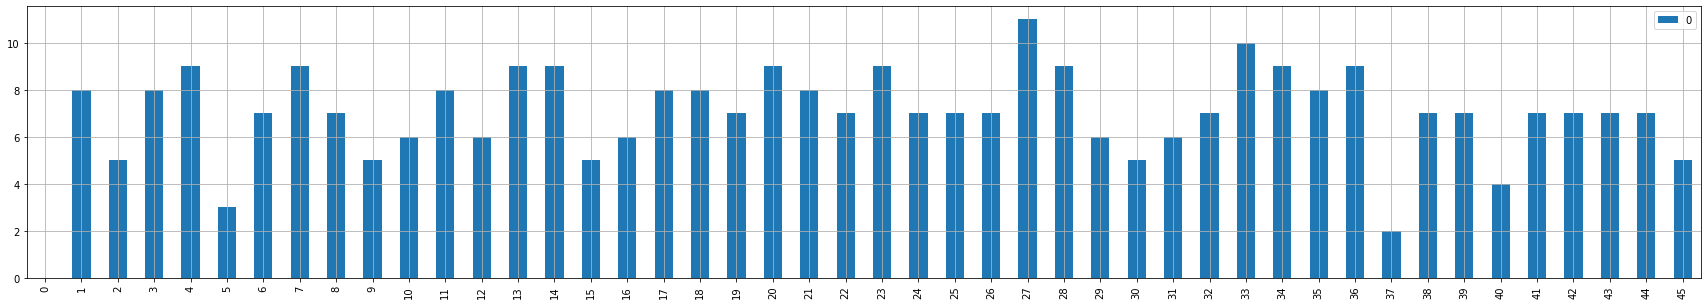

In [33]:
df = pd.DataFrame(scores)
df.plot(kind='bar', figsize=(30, 5))
plt.grid()